In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from scipy.io import loadmat

# SIO 112: CH 2 examples (translated from matlab)

## DepthAgeExample

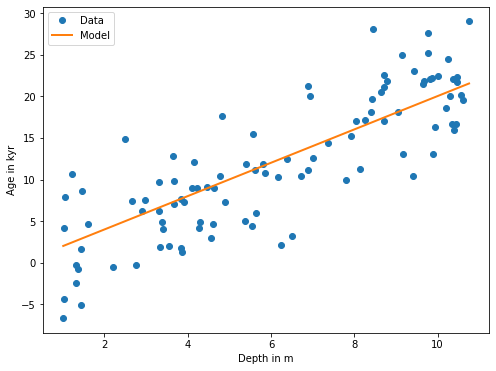

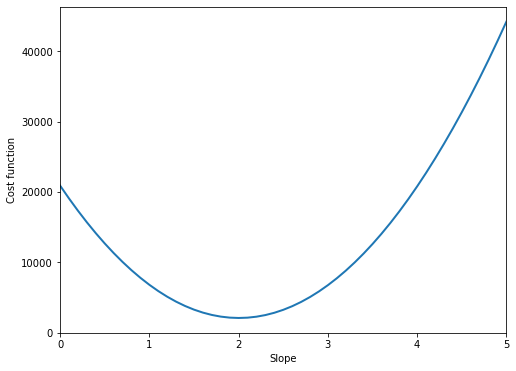

In [3]:
# load the data
data = pd.read_csv('../data/DepthAgeData.txt')   # exit current folder and change into data folder
d = data.d
a = data.a

# find best slope
xopt = np.sum(a*d) / np.sum(d**2)

# plot the data
plt.figure(figsize=(8, 6))
plt.plot(d, a, 'o')
plt.xlabel('Depth in m')
plt.ylabel('Age in kyr');
# plot the optimal model
age_model = xopt * d
plt.plot(d, age_model, linewidth=2)
plt.legend(['Data', 'Model'], loc='upper left');
plt.show()

# plot the cost function
x_test = np.arange(0, 5.1, 0.1)   # slopes to consider
f = np.zeros_like(x_test)
for i in range(len(x_test)):
    f[i] = np.sum((a - x_test[i]*d)**2)
    
plt.figure(figsize=(8, 6))
plt.plot(x_test, f, linewidth=2)
plt.xlabel('Slope')
plt.ylabel('Cost function')
plt.xlim([0,5])
plt.show()

## SteepestDescentMoreImproved

In [4]:
def dfdx(x):
    'Derivative'
    der = 2*x 
    return der

def f(x): 
    'Cost function'
    y = x**2
    return y

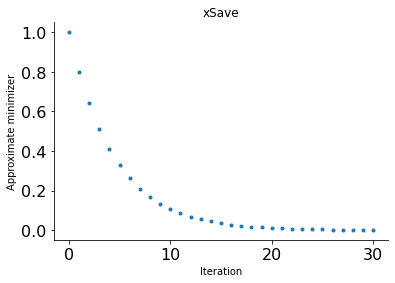

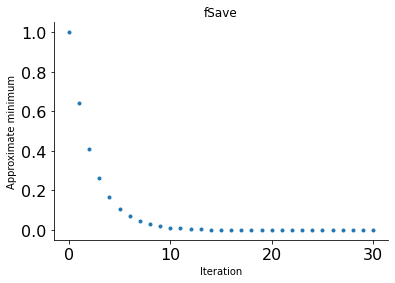

In [5]:
x = 1                # initial guess
a = 0.1              # learning rate 
numIts = int(1e6)    # max number of iterations
tol = 1e-6           # tolerance for declaring convergence

# pre-allocate
xSave = np.zeros(numIts)
xSave[0] = x
fSave = np.zeros(numIts)
fSave[0] = f(x)
count = 1
go = 1

while go == 1:
    count += 1
    x = x - a * dfdx(x)
    xSave[count - 1] = x
    fSave[count - 1] = f(x)
    if abs(fSave[count - 1] - fSave[count - 2]) < tol:
        go = 0
    elif count > numIts:
        go = 0
#         raise Exception('Did not converge. Try adjusting the learning rate or increase the number of iterations allowed.')

xSave = xSave[:count]
fSave = fSave[:count]

plt.figure()
plt.plot(xSave, '.')
plt.xlabel('Iteration')
plt.ylabel('Approximate minimizer')
plt.title('xSave')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().get_xaxis().tick_bottom()
plt.gca().get_yaxis().tick_left()
plt.tick_params(axis='both', which='major', labelsize=16)

plt.figure()
plt.plot(fSave, '.')
plt.xlabel('Iteration')
plt.ylabel('Approximate minimum')
plt.title('fSave')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().get_xaxis().tick_bottom()
plt.gca().get_yaxis().tick_left()
plt.tick_params(axis='both', which='major', labelsize=16)

plt.show()

## SteepestDescentFitSine

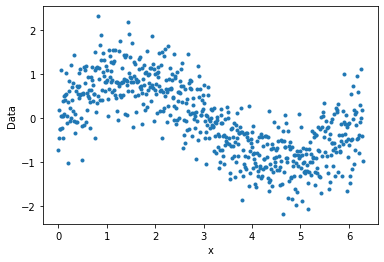

In [7]:
## Load and plot the data
exdata = pd.read_csv('../data/SteepestDescentExData.txt')

plt.plot(exdata.x,exdata.d,'.')
plt.xlabel('x')
plt.ylabel('Data');

In [ ]:
## Plot the cost function